In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file

data = pd.read_csv('BuyComputer.csv')

data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#Declare label as last column in the source file
Y = data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [4]:
#Declaring X as all columns excluding last
X = data.iloc[:,:-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
# Splitting data
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [7]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)

In [8]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(data_train[0])
b = 0.2
print(len_x)

2


In [9]:
entries = len(data_train[:,0])
entries

320

In [10]:
w = np.zeros((len_x))
w

array([0., 0.])

In [11]:
# Sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [12]:

def predict(inputs):
    return sigmoid(inputs @ w.T   + b)

In [13]:
#Loss function
def loss_func(y,h):
    J = -(y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return J         

In [14]:
#Repeating the process 3000 times
JTheta = np.zeros((3000, 1))
learning_rate = 0.1
for iterations in range(3000):
    h = predict(data_train)
    diff = h - target_train
    delta = (learning_rate / data_train.size) * (data_train.T @ diff)
    w = w - delta.T
    delta = (learning_rate / target_train.size) * (np.ones([1, target_train.size]) @ diff)
    b = b - delta
    JTheta[iterations] = loss_func(target_train, h)

In [15]:
#Print weight
print(w)

[2.58868094 1.50544339]


In [16]:
#print bias
print(b)

[-0.98038845]


In [18]:
#predicting the label
preds = predict(data_test)
preds

array([1.55962467e-02, 1.03396451e-01, 8.58857821e-04, 7.46980251e-01,
       1.34363867e-01, 9.85026773e-01, 5.47254055e-02, 5.77471578e-02,
       2.82168551e-01, 1.22314846e-02, 3.26272290e-01, 6.03237383e-01,
       7.28835012e-04, 3.70737343e-01, 2.86022276e-01, 9.88112865e-01,
       8.94551941e-03, 8.66813929e-01, 1.45652003e-02, 3.13494735e-02,
       2.96487368e-01, 9.33252997e-01, 6.16808568e-01, 9.26680296e-01,
       1.77523187e-03, 9.93686576e-01, 4.62624402e-01, 5.31162649e-02,
       9.69135776e-01, 3.54640280e-01, 2.59701136e-01, 8.21309720e-01,
       9.15683306e-01, 7.50536174e-03, 9.98067797e-01, 5.57122349e-01,
       2.44222828e-01, 1.00138587e-02, 5.24810784e-02, 5.87572280e-03,
       3.31412633e-03, 2.01620272e-01, 2.95142937e-01, 6.66273777e-03,
       5.60489585e-02, 3.69232931e-01, 2.02444680e-02, 1.82063299e-03,
       4.36020896e-01, 4.62598671e-01, 1.40333504e-01, 1.61905247e-02,
       9.54446112e-01, 7.02961566e-01, 7.34911583e-01, 8.19438095e-01,
      

In [19]:
def plot_loss(JTheta):
  plt.plot(JTheta, label='loss')
  plt.ylim([min(JTheta), max(JTheta)])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

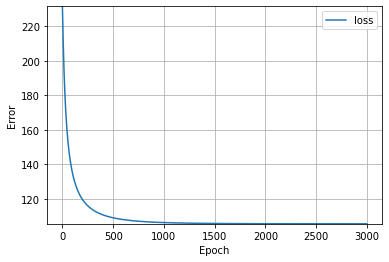

In [20]:
plot_loss(JTheta)


#Using sklearn LogisticRegression model

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 13)

#Fit
LR.fit(data_train, target_train)

#predicting the test label with LR. Predict always takes X as input
preds = LR.predict(data_test)
print('Accuracy:',metrics.accuracy_score(target_test, preds))

Accuracy: 0.8375


**Exercise:**

Try logistic regression on BuyComputer dataset and set Random state=Your_RollNumber (last 3 digit of ID, incase if you don't have ID)